In [1]:
import pandas as pd
import numpy as np
from ast import literal_eval
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

In [2]:
data_df = pd.read_csv("../kham_pha_du_lieu/animals_split_info.csv", index_col = 0)
#                       usecols = ['Name', 'Population trend', 'Population status'])

/tmp/ipykernel_1851/4159428551.py:1: DtypeWarning: Columns (4,22,23) have mixed types. Specify dtype option on import or set low_memory=False.
  data_df = pd.read_csv("../kham_pha_du_lieu/animals_split_info.csv", index_col = 0)


In [3]:
def values(col, array):
    temp = array[col].values.tolist()
    temp = [x for x in temp if type(x) != float]
    temp = np.unique(temp, return_counts=True)
    temp = pd.Series(data = temp[1], index = temp[0])
    return temp

Text(0.5, 1.0, 'Biểu đồ thống kê số lượng loài theo xu hướng phát triển về kích thước quần thể')

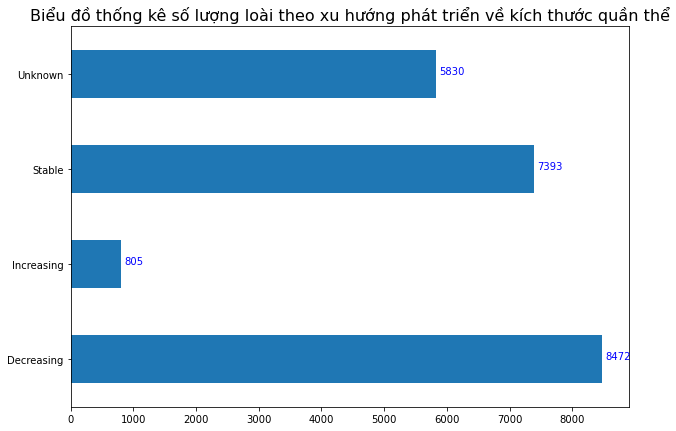

In [4]:
trend = values('Population trend', data_df)
trend.plot(kind = 'barh', figsize = (10, 7))
for index, value in enumerate(trend.values.tolist()):
    plt.text(value + 50, index, str(value), color = 'blue')
plt.title('Biểu đồ thống kê số lượng loài theo xu hướng phát triển về kích thước quần thể', fontsize = 16)

Text(0.5, 1.0, 'Biểu đồ thống kê số lượng loài theo phân loại')

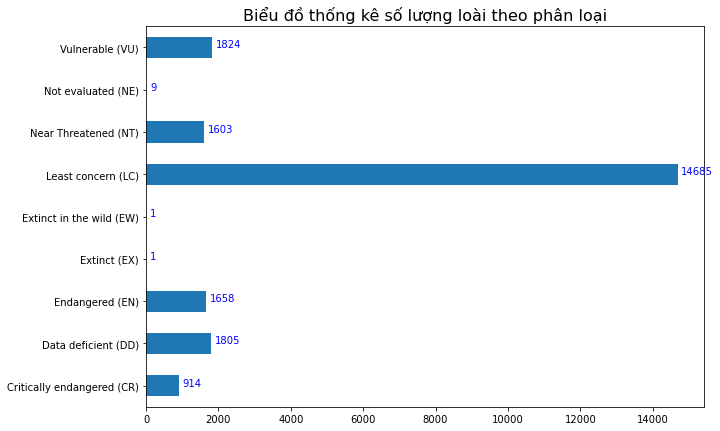

In [5]:
status = values('Population status', data_df)
status.plot(kind = 'barh', figsize = (10, 7))
for index, value in enumerate(status.values.tolist()):
    plt.text(value + 100, index, str(value), color = 'blue')
plt.title('Biểu đồ thống kê số lượng loài theo phân loại', fontsize = 16)

## Vậy thì mối quan hệ giữa 2 cột "Population trend" và "Population status" là gì? Những loài vật đang giảm có phải đang bị đe dọa không? Những loài bị đe dọa có phải đều đang giảm không?

Đầu tiên ta thực hiện thống kê số lượng loài động vật theo 2 cột này

In [6]:
stat_count = data_df.groupby(['Population trend', 'Population status'])['Name'].count().reset_index(name = 'count')
stat_count = stat_count.sort_values(by=['Population trend', 'Population status'])
stat_count.columns = ['trend', 'status', 'count']
# stat_count

Các loài động vật nằm trong nhóm tuyệt chủng, hoặc tuyệt chủng ngoài tự nhiên có số lượng nhỏ (đều là 1) và ta cũng không cần quan tâm đến xu hướng phát triển của chúng. Vậy nên ta sẽ loại bỏ 2 dòng nói trên.

In [7]:
status = status.drop(labels = ['Extinct in the wild (EW)', 'Extinct (EX)'])
# status

Sau đó ta tạo một dataframe tên "data" với số dòng là kích thước của trend x status

In [8]:
data = pd.DataFrame(index = pd.MultiIndex.from_product([trend.index, status.index])).reset_index()
data.columns = ['trend', 'status']
# data

Ta tiến hành điền dữ liệu đã tính được từ "stat_count" để điền vào "data" và lưu vào "merge_data", các cột trống điền là 0

In [9]:
merge_data = pd.merge(stat_count, data, how = 'right').fillna(0)
# merge_data

### Từng xu hướng phát triển kích thước quần thể chiếm tỉ trọng là bao nhiêu phần trăm?

Text(0.5, 1.0, 'Biểu đồ tỉ trọng xu hướng phát triển về độ lớn của kích thước quần thể')

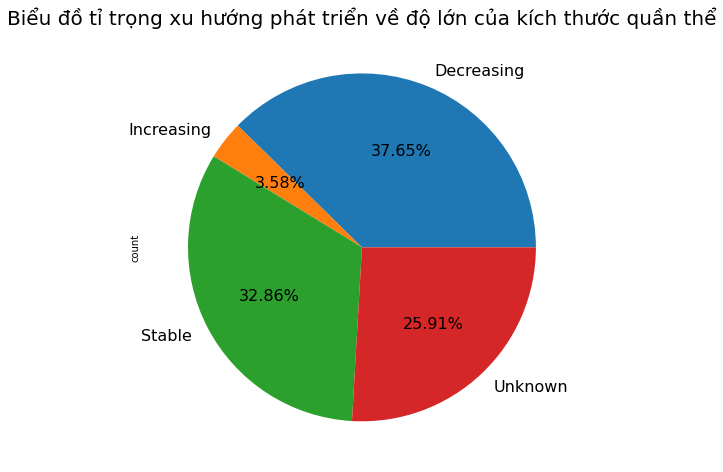

In [10]:
merge_data.groupby(['trend'])['count'].sum().plot(kind = 'pie', autopct='%.2f%%', figsize = (8, 8), fontsize = 16)
plt.title('Biểu đồ tỉ trọng xu hướng phát triển về độ lớn của kích thước quần thể', fontsize = 20)

Nhận xét:
- Số lượng loài có xu hướng giảm chiếm phần lớn tỉ trọng, gấp hơn 10 lần các loài đang có xu hướng tăng. Đây là cảnh báo rất lớn về việc nhiều loài sẽ biến mất trong tương lai, làm ảnh hưởng nghiêm trọng đến đa dạng sinh học và cân bằng trong môi trường.

### Theo phân loại trong cột status, từng loại chiếm tỉ trọng bao nhiêu phần trăm

Text(0.5, 1.0, 'Biểu đồ tỉ trọng theo phân loại mức độ bị đe dọa của động vật')

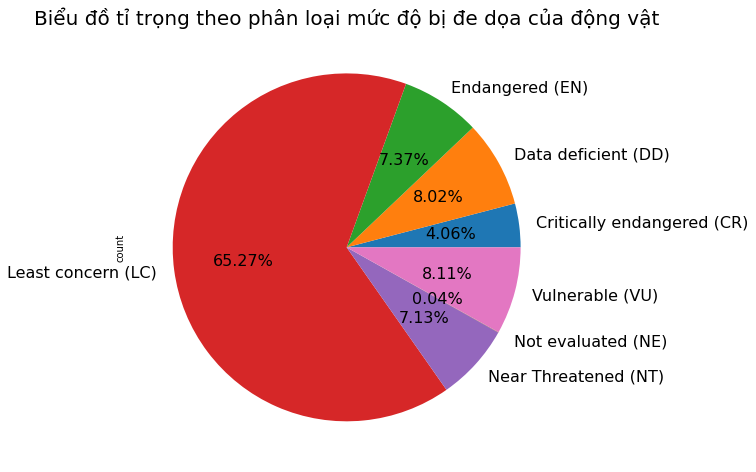

In [11]:
merge_data.groupby(['status'])['count'].sum().plot(kind = 'pie', autopct='%.2f%%', figsize = (8, 8), fontsize = 16)
plt.title('Biểu đồ tỉ trọng theo phân loại mức độ bị đe dọa của động vật', fontsize = 20)

Nhận xét:
- Loài nằm trong nhóm Lower risk: it được quan tâm (LC: 65.27&) hoặc ít bị đe dọa (NT: 7.13%) chiếm tổng tỉ trọng lớn nhất
- Nhóm Not fully assessed: loài thiếu thông tin bao gồm (DD: 8.02%, NE: 0.04%) chiếm tổng tỉ trọng thấp nhất
- Còn lại nằm trong nhóm Threatened: bị đe dọa chiếm dưới 20%

### Ta sẽ biểu diễn tỉ trọng theo từng phân loại trong cột status theo từng xu hướng tăng giảm

Text(0.5, 0.98, 'Biểu đồ tỉ trọng của phân loại động vật theo từng xu hướng tăng giảm')

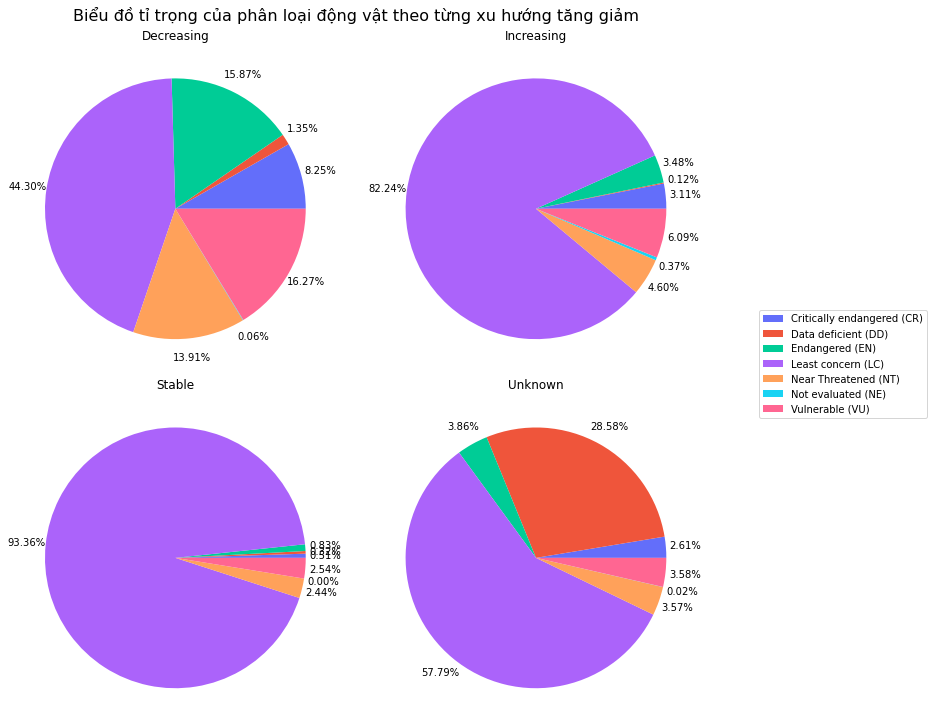

In [12]:
colors = ['#636EFA', '#EF553B', '#00CC96', '#AB63FA', '#FFA15A', '#19D3F3', '#FF6692', '#B6E880', '#FF97FF']
fig, ax = plt.subplots(2, 2, figsize = (10, 10), constrained_layout = True)
for i in range(len(trend.index)):
    temp = merge_data[merge_data['trend'] == trend.index[i]]
    ax[i // 2][i % 2].pie(temp['count'], autopct='%.2f%%', labels = None, pctdistance=1.15, colors = colors)
    ax[i // 2][i % 2].set_title(trend.index[i])
fig.legend(labels = status.index, loc="right", bbox_to_anchor=(1.3, 0.5))
fig.suptitle('Biểu đồ tỉ trọng của phân loại động vật theo từng xu hướng tăng giảm', fontsize = 16)

Nhận xét:
- Có quá nhiều loại trong cột status nên sẽ khó để đánh giá và có nhiều loại chiến tỉ trọng rất nhỏ nên số bị đè lên nhau.
Như vậy ta sẽ tiến hành giảm số lượng giá trị như trong phân loại ở phần đánh giá trên.

Phân loại được lưu trong file "new_status.csv" là một dataframe có 2 cột là "status" và "new_status". Ta tiến hành đọc file và merge với dữ liệu ban đầu để cho ra dữ liệu mới

In [13]:
new_status = pd.read_csv('new_status.csv')
new_status.columns = ['status', 'new_status']
merge_data = pd.merge(merge_data, new_status)
# merge_data

In [14]:
new_status = new_status['new_status'].values.tolist()
new_status = np.unique(new_status)
new_status

array(['Lower risk', 'Not fully assessed', 'Threatened'], dtype='<U18')

Text(0.5, 0.98, 'Biểu đồ tỉ trọng của phân loại động vật theo từng xu hướng tăng giảm')

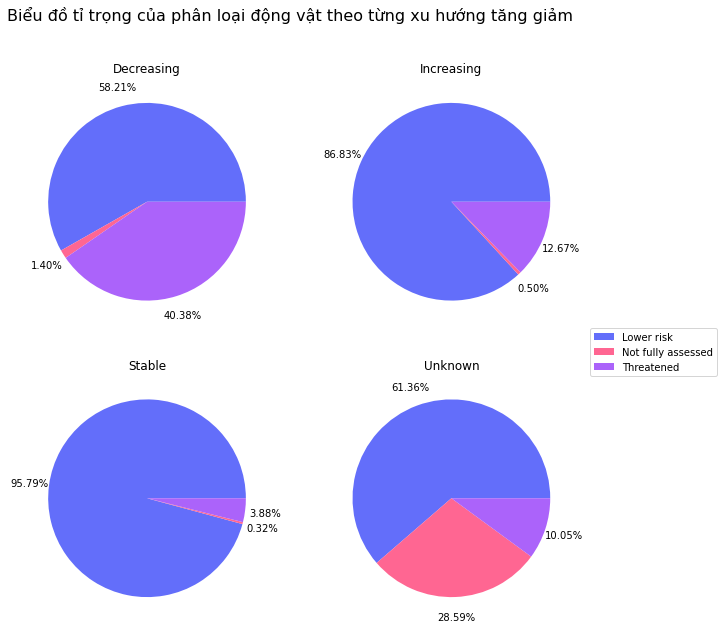

In [15]:
colors = ['#636EFA', '#FF6692', '#AB63FA', '#FF97FF']
fig, ax = plt.subplots(2, 2, figsize = (10, 10))
for i in range(len(trend.index)):
    temp = merge_data[merge_data['trend'] == trend.index[i]]
    temp = temp.groupby(['trend', 'new_status'])['count'].sum().reset_index(name = 'sum')
    ax[i // 2][i % 2].pie(temp['sum'], autopct='%.2f%%', labels = None, pctdistance=1.2, colors = colors)
    ax[i // 2][i % 2].set_title(trend.index[i])
fig.legend(labels = temp['new_status'], loc="right", bbox_to_anchor=(1.1, 0.5))
fig.suptitle('Biểu đồ tỉ trọng của phân loại động vật theo từng xu hướng tăng giảm', fontsize = 16)

Nhận xét:
- Nhìn vào biểu đồ ta có thể thấy nhóm ít được quan tâm chiếm tỉ trọng rât lớn, ở bất kỳ xu hướng nào nó cũng chiếm tỉ trọng hơn 50%, trong nhóm Stable (ổn định) đặc biệt chiếm tới 95.79%.
- Loài bị thiếu thông tin chiếm tỉ trọng hơn 8% trong tổng số loài nhưng chỉ chiếm rất nhỏ (dưới 1.5%) trong các loài đã xác định được xu hướng, trong khi đó lại chiếm tận 28.59% trong loài không xác định. Điều này cũng dễ hiểu do loài này chưa được đánh giá dầy đủ hoặc bị thiếu thông tin.
- Chiếm tỉ trọng lớn thứ 2 là nhóm bị đe dọa, như bên trên ta đã thấy nhóm có xu hướng giảm gấp khoảng 10 lần xu hướng tăng, và ở biểu đồ này ta lại thấy loài bị đe dọa chiếm đến hơn 40% trong nhóm có xu hướng giảm và chỉ chiếm 12.67% trong nhóm tăng, như vậy ta có thể suy ra rằng phần lớn các loài bị đe dọa đều có xu hướng giảm. Điều này sẽ được chứng thực qua biểu đồ bên dưới

Text(0.5, 0.68, 'Biểu đồ tỉ trọng của xu hướng tăng giảm theo phân loại động vật')

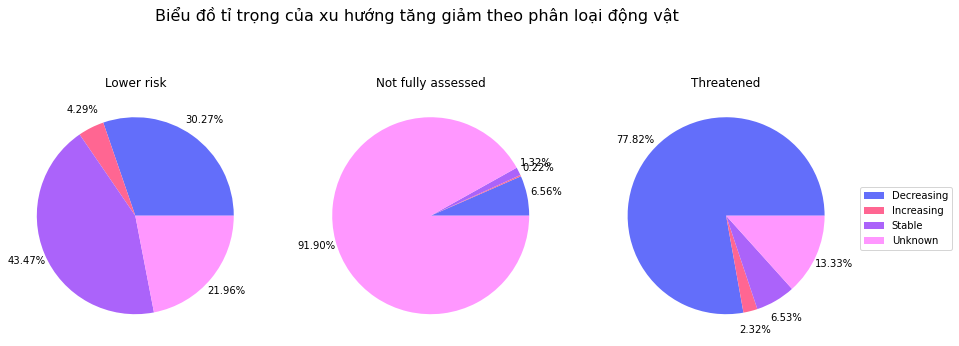

In [16]:
fig, ax = plt.subplots(1, 3, figsize = (15, 15))
for i in range(len(new_status)):
    temp = merge_data[merge_data['new_status'] == new_status[i]]
    temp = temp.groupby(['new_status', 'trend'])['count'].sum().reset_index(name = 'sum')
    ax[i].pie(temp['sum'], autopct='%.2f%%', labels = None, pctdistance=1.2, colors = colors)
    ax[i].set_title(new_status[i])
fig.legend(labels = trend.index, loc="right", bbox_to_anchor=(1, 0.5))
fig.suptitle('Biểu đồ tỉ trọng của xu hướng tăng giảm theo phân loại động vật', fontsize = 16, va='bottom', y = 0.68)

Nhận xét:
- Với loài bị đe dọa, 77.82% có xu hướng giảm gấp hơn 30 lần với xu hướng tăng chỉ có 2.32%, điều này đáng để quan tâm do những loài này là những loài sắp phải đối mặt với nguy cơ bị tuyệt chủng, nhưng hầu hết đều lại đang giảm, như vậy chúng ta đang ngày một tiến gần với nguy cơ mất đi đa dạng sinh học, mất cân bằng sinh thái. Ít nhất phải đưa ra được biện pháp bảo vệ hoặc giữ ổn định loài.
- Với loài ít quan tâm (có mức độ bị đe dọa thấp) ta thấy xu hướng giảm chỉ chiếm 30.27% dưới 1/3 tổng số loài và gấp hơn 6 lần đối với loài có xu hướng tăng, cách biệt rất lớn với nhóm bị đe dọa có xu hướng giảm chiếm hơn 3/4. Các loài có sự ổn định cao.
- Loài thiếu thông tin đa phần có xu hướng chưa rõ (hơn 90%), nhưng tỉ lệ giữa loài có xu hướng giảm và tăng vẫn rất cao (gấp gần 30 lần).